In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np

# Path to the log.json file
file_path = '/Users/antonlenander/git/CommunityFlex/log.json'

new_metrics = {}


# Open and read the log.json file
with open(file_path, 'r') as file:
    log_data = json.load(file)
    # Iterate through the list in the "steps" key
    for step in log_data.get('steps', []):
        #print(step)
        metrics = step.get('metrics', {})
        if isinstance(metrics, dict):
            for key, value in metrics.items():
                if key not in new_metrics:
                    new_metrics[key] = []
                new_metrics[key].append(value)
                
agent = 'H5'

#start = 336*4*6
#end = 336*4*7 - (336*3)
start = 0
end = 48*182

current_load = new_metrics[f'{agent}/current_load']
current_prod = new_metrics[f'{agent}/current_prod']
current_charge = new_metrics[f'{agent}/current_charge']
current_supply = new_metrics[f'{agent}/current_supply']
net_loss = new_metrics[f'{agent}/net_loss']

total_load = new_metrics['env/total_load']
total_prod = new_metrics['env/total_prod']
total_charge = new_metrics['env/total_charge']
total_supply = new_metrics['env/total_supply']
total_self_consumption = new_metrics['env/self_consumption']
total_local_bought = new_metrics['env/current_local_bought']
total_avail_energy = new_metrics['env/total_avail_energy']
total_surplus_energy = new_metrics['env/total_surplus_energy']
total_net_loss = new_metrics['env/total_loss']


current_load = current_load[start:end]
current_prod = current_prod[start:end]
current_charge = current_charge[start:end]
current_supply = current_supply[start:end]
net_loss = net_loss[start:end]

total_load = total_load[start:end]
total_prod = total_prod[start:end]
total_charge = total_charge[start:end]
total_supply = total_supply[start:end]
total_self_consumption = total_self_consumption[start:end]
total_local_bought = total_local_bought[start:end]
total_avail_energy = total_avail_energy[start:end]
total_surplus_energy = total_surplus_energy[start:end]

print(sum(current_prod))
print(sum(current_load))

# plt.plot(current_load, label='load')
# plt.plot(current_prod, label='production')
# plt.plot(current_supply, label='supply balance')
# #plt.plot(current_charge, label='battery charge')
plt.plot(net_loss, label='net loss')

plt.legend()
plt.show()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

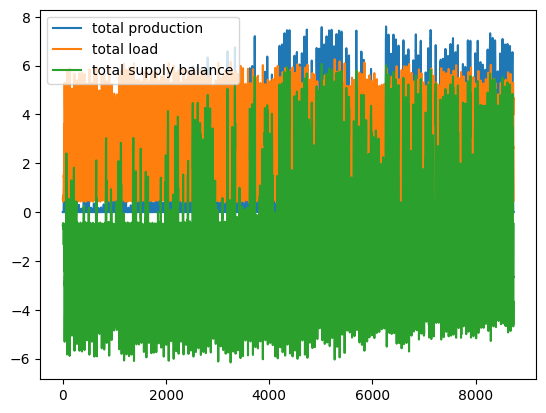

In [ ]:
plt.plot(total_prod, label='total production')
plt.plot(total_load, label='total load')
plt.plot(total_supply, label='total supply balance')
plt.legend()
plt.show()

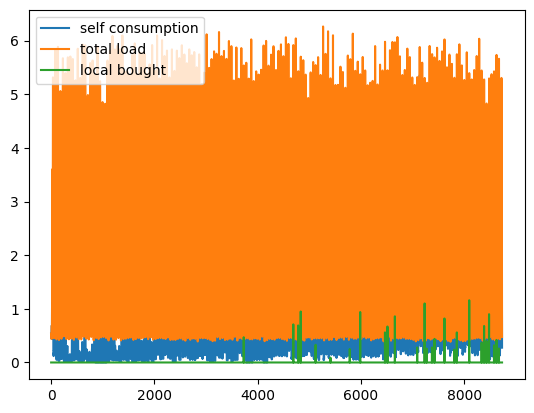

In [ ]:
total_E_local = np.add(total_local_bought, total_self_consumption)

plt.plot(total_self_consumption, label='self consumption')
# plt.plot(total_E_local, label='local energy')
plt.plot(total_load, label='total load')
plt.plot(total_local_bought, label='local bought')
# plt.plot(np.divide(net_loss, 150))
plt.legend()
plt.show()



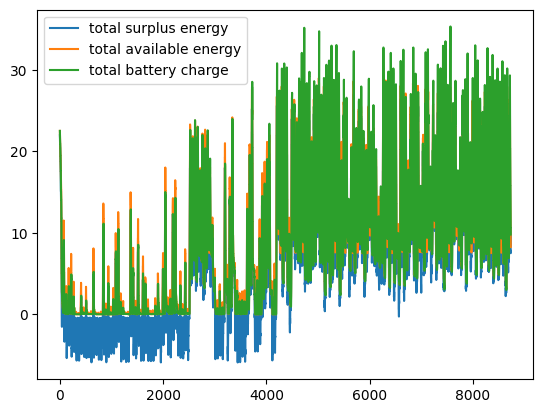

In [ ]:
plt.plot(total_surplus_energy, label='total surplus energy')
plt.plot(total_avail_energy, label='total available energy')
plt.plot(total_charge, label='total battery charge')
plt.plot()
plt.legend()
plt.show()

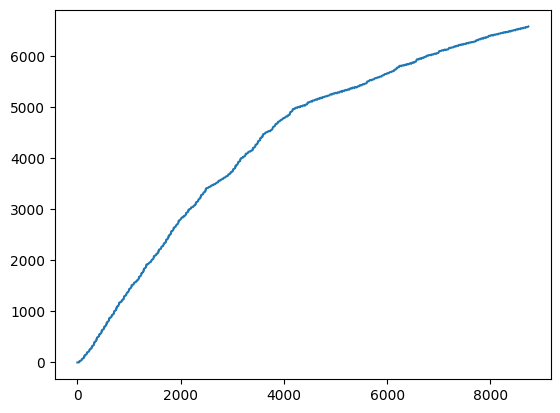

In [ ]:
plt.plot(total_net_loss, label='total net loss')

(array([1.114e+03, 5.900e+02, 5.480e+02, 3.540e+02, 3.940e+02, 3.580e+02,
        3.300e+02, 2.980e+02, 3.240e+02, 2.260e+02, 2.630e+02, 1.980e+02,
        2.380e+02, 4.310e+02, 4.390e+02, 2.350e+02, 1.410e+02, 1.810e+02,
        2.072e+03, 2.000e+00]),
 array([0.        , 0.05341339, 0.10682677, 0.16024016, 0.21365354,
        0.26706693, 0.32048031, 0.3738937 , 0.42730708, 0.48072047,
        0.53413385, 0.58754724, 0.64096062, 0.69437401, 0.7477874 ,
        0.80120078, 0.85461417, 0.90802755, 0.96144094, 1.01485432,
        1.06826771]),
 <BarContainer object of 20 artists>)

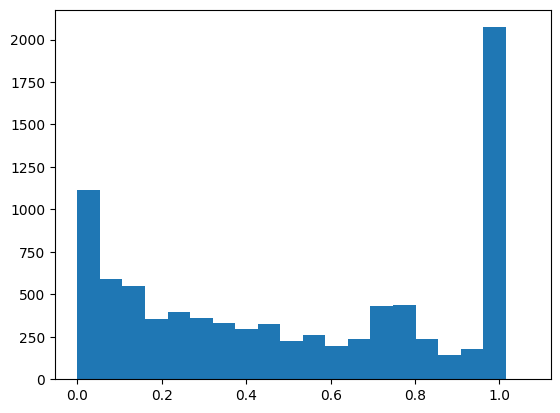

In [ ]:
ss = np.divide(total_E_local, total_load)

#plt.plot(ss, label='self sufficiency')
plt.hist(ss, bins=20)